In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import join, exists
import matplotlib

In [2]:
def order_columns(column_names):
    column_names = sorted(column_names, key=lambda x: int(x.split('-')[-1]) + 100 if 'classifier' in x else int(x.split('-')[-1])) 
    column_names.remove
    return column_names

def extract_layer_saturation(df, excluded = 'classifier-6', epoch=19):
    df = df.reindex(sorted(df.columns), axis=1)
    cols = list(df.columns)
    #print(cols)
    train_cols = [col for col in cols if 'train' in col and not excluded in col and not 'accuracy' in col and not 'loss' in col]
    train_cols = order_columns(train_cols)
    
    #print(list(train_cols))
    epoch_df = df[df.index.values == epoch]
    accuray = epoch_df['test_accuracy'].values[0]
    epoch_df = epoch_df[train_cols]
    
    return epoch_df, accuray

In [3]:
def plot_saturation_level(df, title=''):
    cols = list(df.columns)
    col_names = ['Layer {}'.format(i+1) for i in range(len(df.columns))]
    plt.figure(figsize=(7,5))
    plt.grid()
    plt.bar(list(range(len(cols))), df.values[0])
    plt.xticks(list(range(len(cols))), col_names, rotation='vertical', fontsize=16)
    plt.ylim((0,100))
    plt.yticks(fontsize=16)
    plt.xlabel('Layers', fontsize=16)
    plt.title(title, fontsize=16)
    plt.ylabel('Saturation in %', rotation='vertical', fontsize=16)
    plt.show()
    
def plot_saturation_level_ax(df, ax, acc=-1):
    cols = list(df.columns)
    col_names = [i+1 for i in range(len(df.columns))]
    ax.grid()
    ax.bar(list(range(len(cols))), df.values[0])
    ax.set_xticks([])
    ax.set_ylim((0,100))
    ax.text(1, 80, 'Accuray: {}'.format(acc))
    #plt.yticks(fontsize=16)
    #plt.xlabel('Layers', fontsize=16)
    #plt.title(title, fontsize=16)
    #plt.ylabel('Saturation in %', rotation='vertical', fontsize=16)_

# ADAM

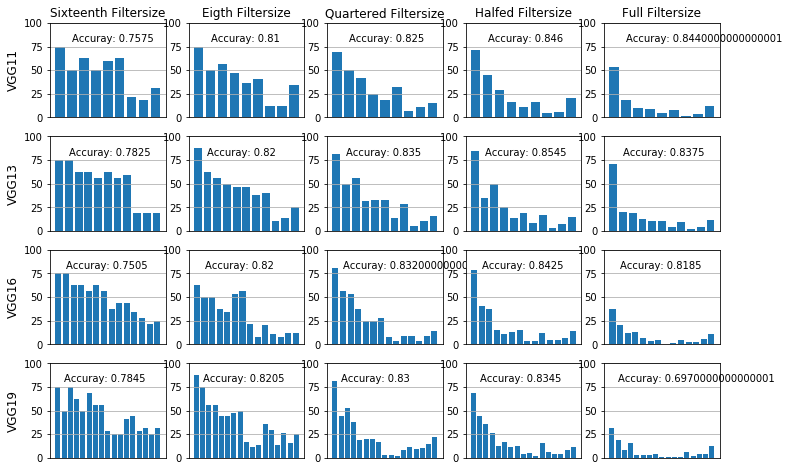

In [4]:
import matplotlib.pyplot as plt
batch_size = 8
identifieer = 'ADAM'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'CatVsDog','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')

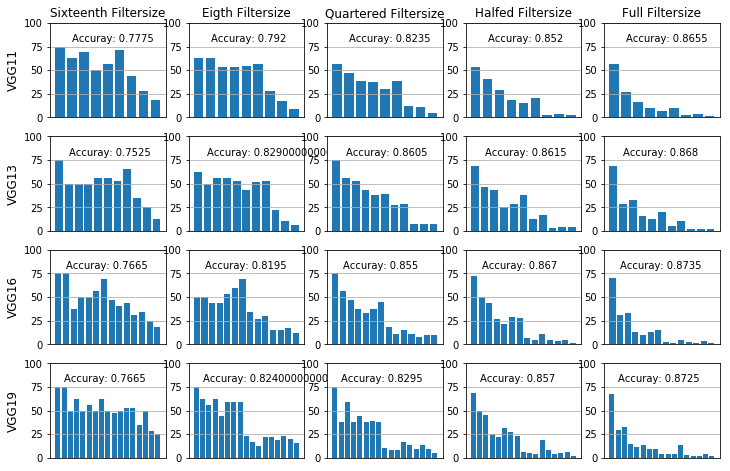

In [5]:
import matplotlib.pyplot as plt
batch_size = 32
identifieer = 'ADAM'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'CatVsDog','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')

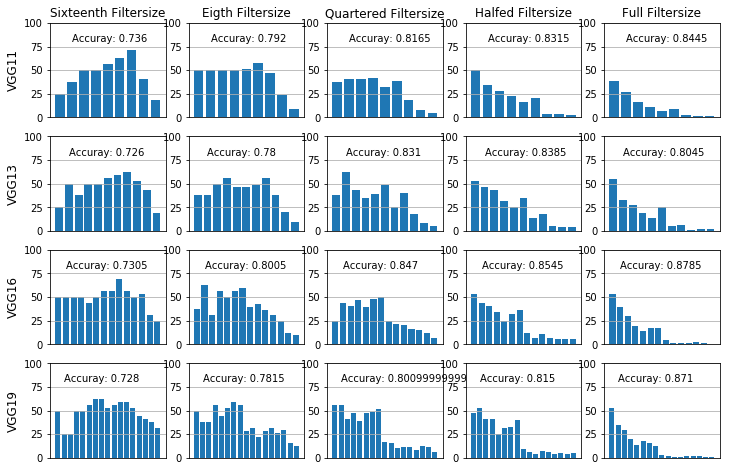

In [6]:
import matplotlib.pyplot as plt
batch_size = 128
identifieer = 'ADAM'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'CatVsDog','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')

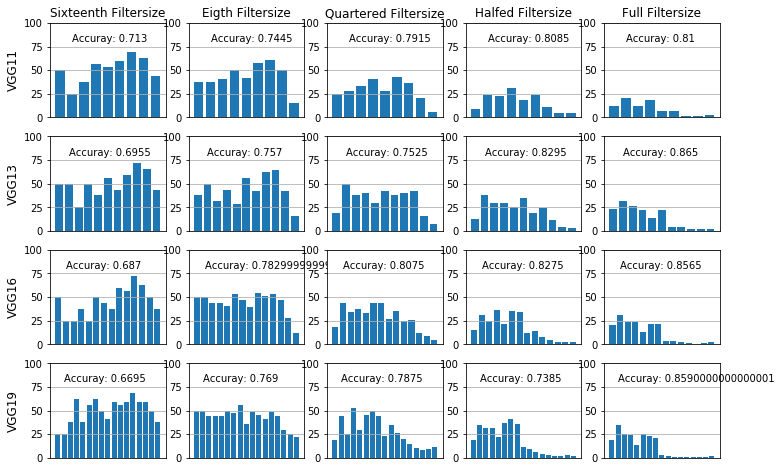

In [7]:
import matplotlib.pyplot as plt
batch_size = 512
identifieer = 'ADAM'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'CatVsDog','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')

# RADAM

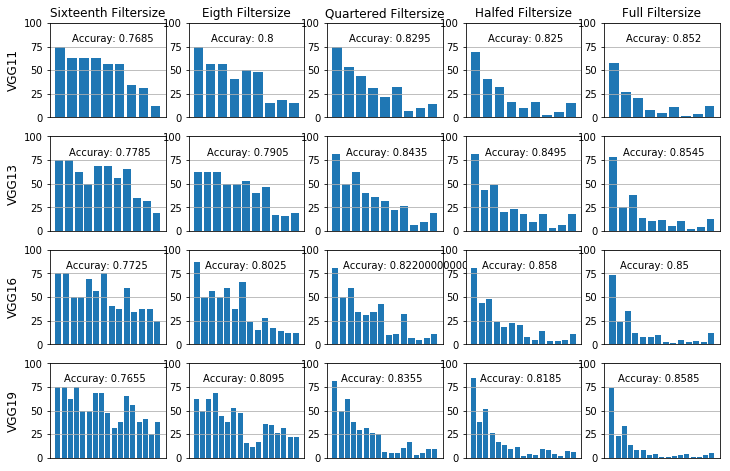

In [8]:
import matplotlib.pyplot as plt
batch_size = 8
identifieer = 'RADAM'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'CatVsDog','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')

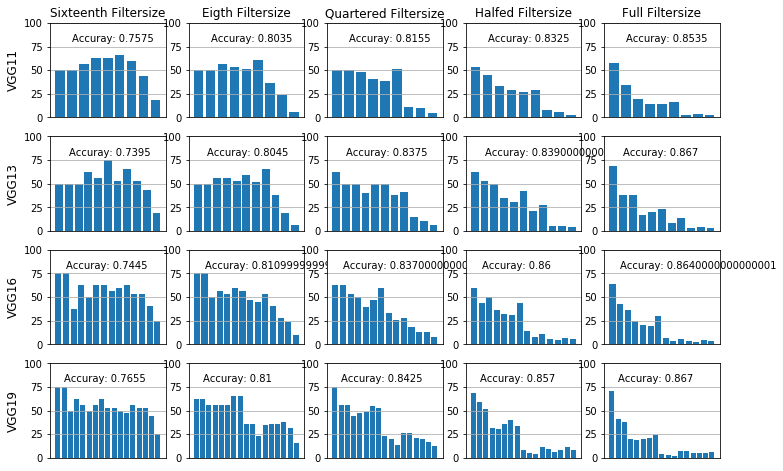

In [9]:
import matplotlib.pyplot as plt
batch_size = 32
identifieer = 'RADAM'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'CatVsDog','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')

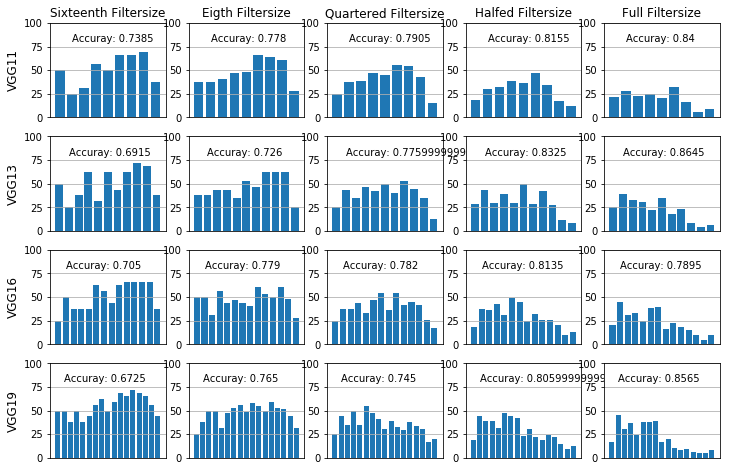

In [10]:
import matplotlib.pyplot as plt
batch_size = 128
identifieer = 'RADAM'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'CatVsDog','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')

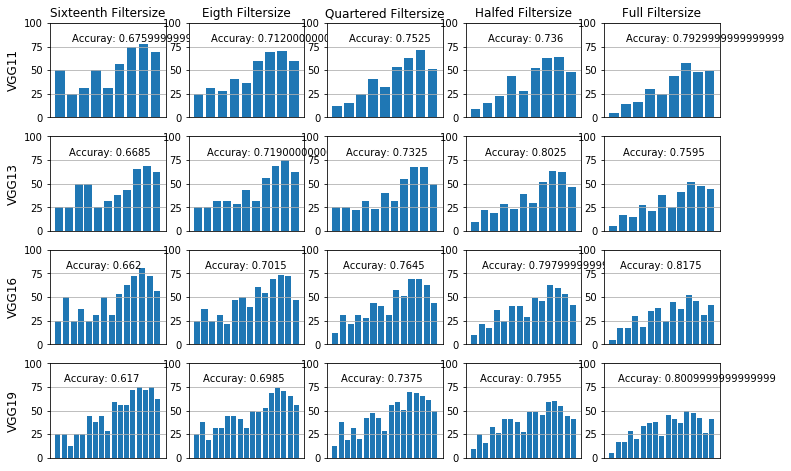

In [11]:
import matplotlib.pyplot as plt
batch_size = 512
identifieer = 'RADAM'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'CatVsDog','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')

# Gradient Decent

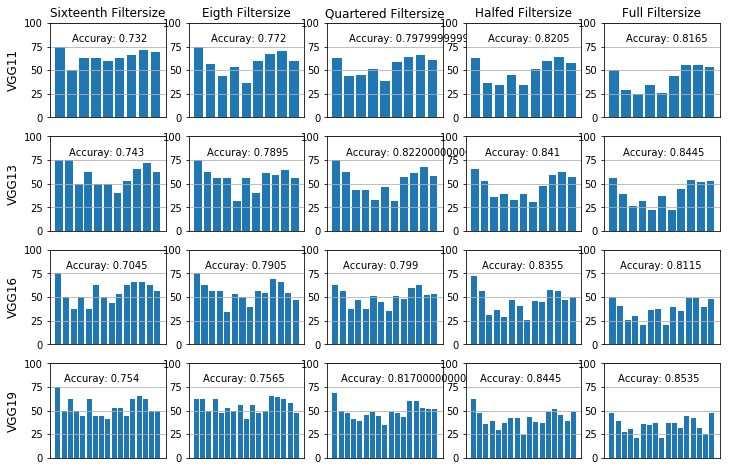

In [12]:
import matplotlib.pyplot as plt
batch_size = 8
identifieer = '0'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'CatVsDog','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')

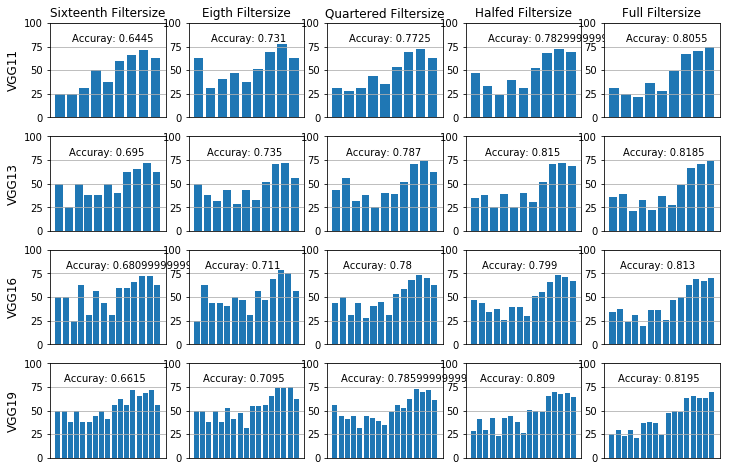

In [13]:
import matplotlib.pyplot as plt
batch_size = 32
identifieer = '0'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'CatVsDog','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')

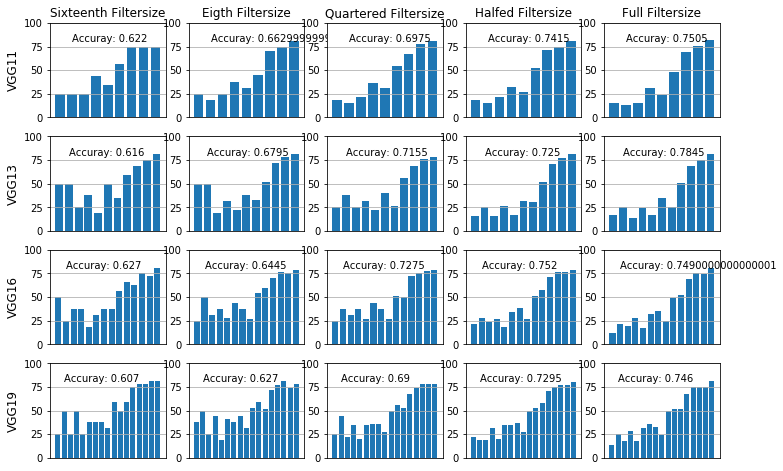

In [14]:
import matplotlib.pyplot as plt
batch_size = 128
identifieer = '0'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'CatVsDog','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')

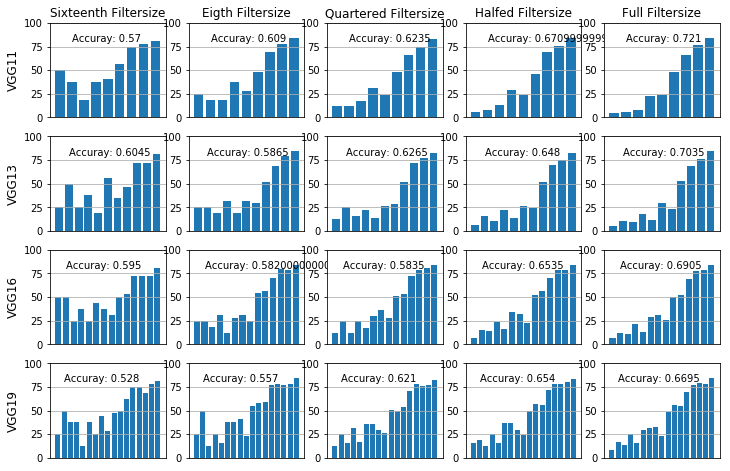

In [15]:
import matplotlib.pyplot as plt
batch_size = 512
identifieer = '0'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'CatVsDog','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')

# Decaying Learning Rate

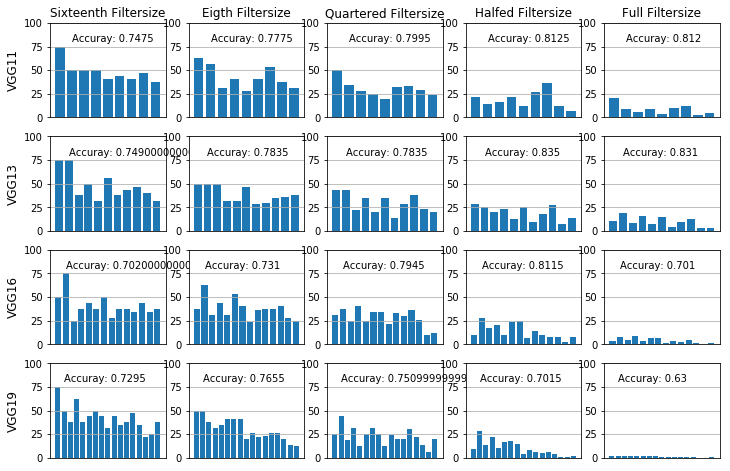

In [16]:
import matplotlib.pyplot as plt
batch_size = 8
identifieer = 'LRS'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'CatVsDog','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')

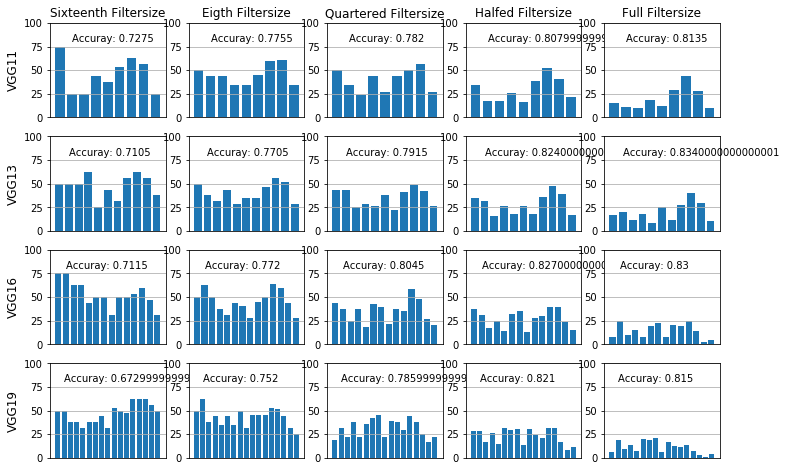

In [17]:
import matplotlib.pyplot as plt
batch_size = 32
identifieer = 'LRS'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'CatVsDog','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')

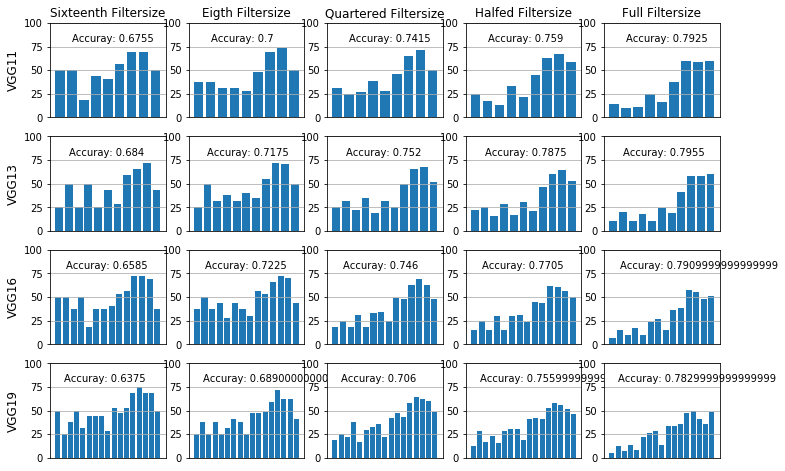

In [18]:
import matplotlib.pyplot as plt
batch_size = 128
identifieer = 'LRS'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'CatVsDog','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')

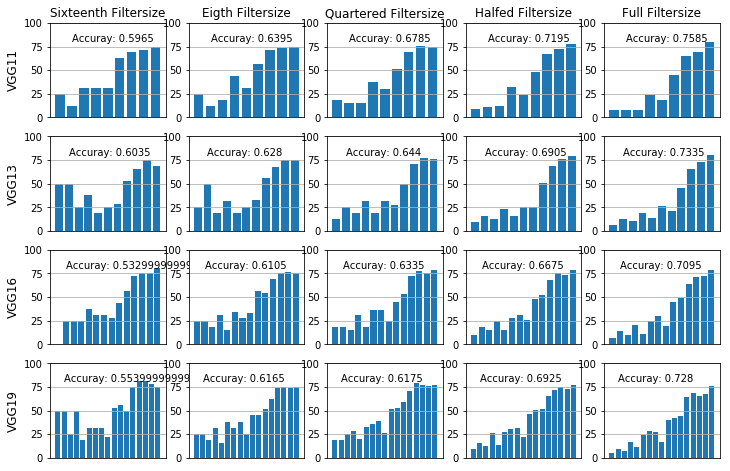

In [19]:
import matplotlib.pyplot as plt
batch_size = 512
identifieer = 'LRS'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'CatVsDog','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')